# Importing Libraries & Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


In [ ]:
tracks = pd.read_csv('tracks_records.csv')
tracks.head()


In [ ]:
tracks.info()


In [ ]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()


Data Cleaning
Data Cleaning is one of the important steps without which data will be of no use because the raw data contains a lot of noises that must be removed else the observations made from it will be inaccurate and if we are building a model upon it then it’s performance will be poor as well. Steps included in the data cleaning are outlier removal, null value imputation, and fixing the skewness of the data.

In [ ]:
tracks = tracks.drop(['id', 'id_artists'], axis = 1)


In [ ]:
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(a.head(500))
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()


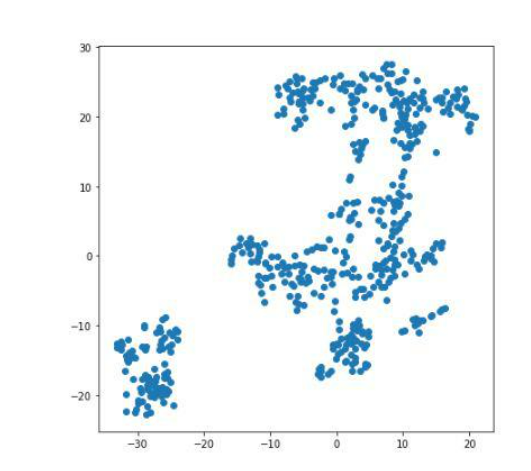

In [ ]:
tracks['name'].nunique(), tracks.shape


In [ ]:
plt.figure(figsize = (10, 5))
sb.countplot(tracks['release_year'])
plt.axis('off')
plt.show()


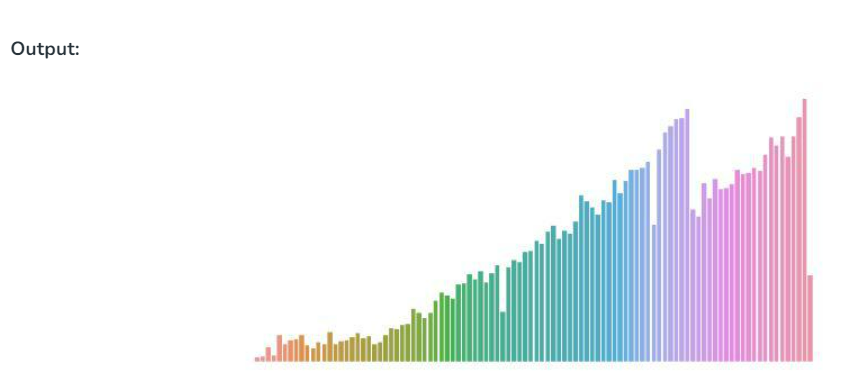

In [ ]:
floats = []
for col in tracks.columns:
if tracks[col].dtype == 'float':
	floats.append(col)

len(floats)


In [ ]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
plt.subplot(2, 5, i + 1)
sb.distplot(tracks[col])
plt.tight_layout()
plt.show()


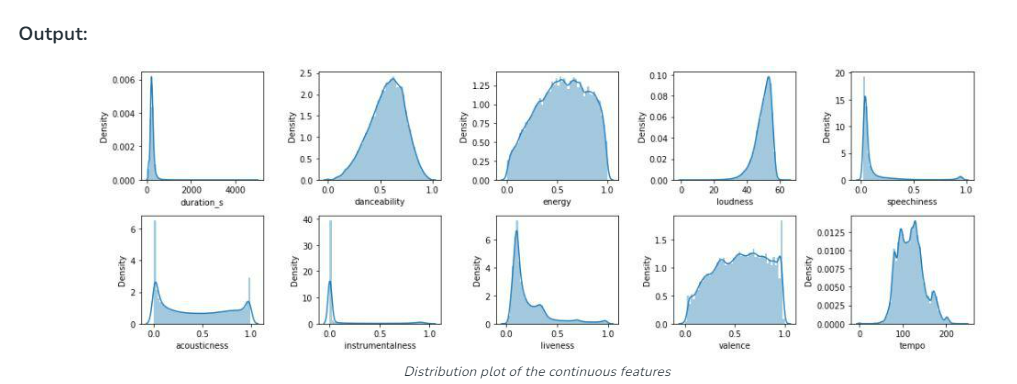

In [ ]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['genres'])


In [ ]:
tracks = tracks.sort_values(by=['popularity'], ascending=False).head(10000)


In [ ]:
def get_similarities(song_name, data):

# Getting vector for the input song.
text_array1 = song_vectorizer.transform(data[data['name']==song_name]['genres']).toarray()
num_array1 = data[data['name']==song_name].select_dtypes(include=np.number).to_numpy()

# We will store similarity for each row of the dataset.
sim = []
for idx, row in data.iterrows():
	name = row['name']
	
	# Getting vector for current song.
	text_array2 = song_vectorizer.transform(data[data['name']==name]['genres']).toarray()
	num_array2 = data[data['name']==name].select_dtypes(include=np.number).to_numpy()

	# Calculating similarities for text as well as numeric features
	text_sim = cosine_similarity(text_array1, text_array2)[0][0]
	num_sim = cosine_similarity(num_array1, num_array2)[0][0]
	sim.append(text_sim + num_sim)
	
return sim


In [ ]:
def recommend_songs(song_name, data=tracks):
# Base case
if tracks[tracks['name'] == song_name].shape[0] == 0:
	print('This song is either not so popular or you\
	have entered invalid_name.\n Some songs you may like:\n')
	
	for song in data.sample(n=5)['name'].values:
	print(song)
	return

data['similarity_factor'] = get_similarities(song_name, data)

data.sort_values(by=['similarity_factor', 'popularity'],
				ascending = [False, False],
				inplace=True)

# First song will be the input song itself as the similarity will be highest.
display(data[['name', 'artists']][2:7])


In [ ]:
recommend_songs('Love Someone')


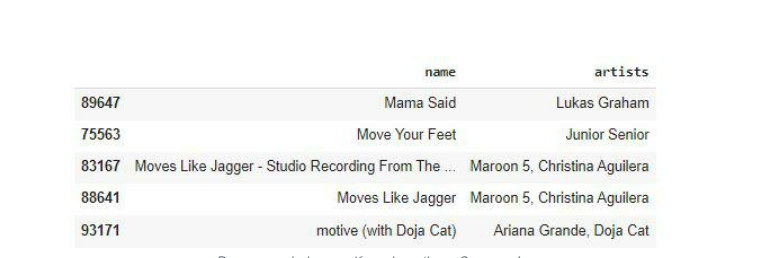

In [ ]:
recommend_songs('Love me like you do')


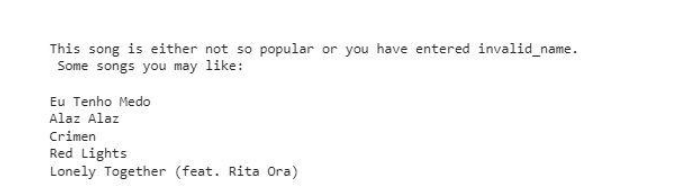